# Rawdata preprocessing

In [196]:
import pandas as pd
import numpy as np


filename = 'allseason_2m_rawdata.json'

allseason = pd.read_json(filename)


In [197]:
base_df = allseason[['id','username','hashtags']]
#base_df.head()
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 3 columns):
id          19981 non-null object
username    19981 non-null object
hashtags    19981 non-null object
dtypes: object(3)
memory usage: 468.4+ KB


In [198]:
base_df.head()

,id,username,hashtags
0,BtOm-dkHn5v,petraruzicka,"[sport, travelling, winterfashion, cestovani, ..."
1,BtQp-IfHkzq,sonesta007,"[instagood, instastyle, fashionblog, fashionbl..."
2,BtRdH3UBQ6i,heofficial_,"[london, like4like, corduroy, beanie, ootd, uk..."
3,BtRJG92g_CG,thefashionbeautygalleria,[]
4,BtOpNQpApMI,fashionablyfifty,"[styleover50, chiberia, styleisforlife, thrift..."


In [8]:
base_df.drop(columns=['id'])

,username,hashtags
0,petraruzicka,"[sport, travelling, winterfashion, cestovani, ..."
1,sonesta007,"[instagood, instastyle, fashionblog, fashionbl..."
2,heofficial_,"[london, like4like, corduroy, beanie, ootd, uk..."
3,thefashionbeautygalleria,[]
4,fashionablyfifty,"[styleover50, chiberia, styleisforlife, thrift..."
5,mariadelosangeles_mdla,"[lasvegas, style, mariadelosangeles_mdla, inst..."
6,samuelsquanders,[]
7,varvara_zhidkovaw,"[blizzard, winter2018, instawinter, seasons, w..."
8,simplymariahk,[]
9,loulouboutiques,"[raleighblogger, shawlvest, winterfashion, bou..."


In [9]:
base_df.index = base_df['username']

In [12]:
base_df = base_df.drop(columns=['id'])

KeyError: "['id'] not found in axis"

In [13]:
base_df = base_df.drop(columns=['username'])

In [14]:
base_df.head()

,hashtags
username,
petraruzicka,"[sport, travelling, winterfashion, cestovani, ..."
sonesta007,"[instagood, instastyle, fashionblog, fashionbl..."
heofficial_,"[london, like4like, corduroy, beanie, ootd, uk..."
thefashionbeautygalleria,[]
fashionablyfifty,"[styleover50, chiberia, styleisforlife, thrift..."


In [15]:
# 잘못된 데이터들을 처리해줍니다.
fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, petraruzicka to raineydaerunway
Data columns (total 1 columns):
hashtags    17644 non-null object
dtypes: object(1)
memory usage: 275.7+ KB


In [25]:
test = fashion_df['hashtags']

In [ ]:
# fashion_df = fashion_df[1:]
fashion_df.head()

In [17]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, petraruzicka to raineydaerunway
Data columns (total 1 columns):
hashtags    17644 non-null object
dtypes: object(1)
memory usage: 275.7+ KB


In [18]:
# 태그가 몇번 나왔는지 세어주는 함수입니다.
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

sort_dict = getTagsDict(fashion_df)

In [19]:
sort_dict[-10:]

[('fashionista', 2276),
 ('instafashion', 2587),
 ('fashionblogger', 3139),
 ('ootd', 4257),
 ('style', 4389),
 ('fallfashion', 4400),
 ('summerfashion', 4822),
 ('springfashion', 4845),
 ('winterfashion', 6016),
 ('fashion', 6847)]

In [37]:
tag_df = fashion_df['hashtags']

tag_df = list(tag_df)

In [40]:
for i in range(len(tag_df)):
    tag_df[i] = list(set(tag_df[i]))

In [41]:
fashion_df['hashtags'] = tag_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
# 중복을 제거해줍니다. (한 글에 동일한 태그 여러 번)

tag_df = list(fashion_df['hashtags'])

for i in range(len(tag_df)):
#     if "fashion" in tag_df[i] == False:
#         print(tag_df[i])
    tag_df[i] = list(set(tag_df[i]))

fashion_df['hashtags'] = tag_df


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyboardInterrupt: 

In [42]:
fashion_dict = getTagsDict(fashion_df)
print(fashion_dict[-10:])
print(fashion_df.info())

[('fashionista', 2276), ('instafashion', 2587), ('fashionblogger', 3139), ('ootd', 4250), ('style', 4389), ('fallfashion', 4400), ('summerfashion', 4822), ('springfashion', 4845), ('winterfashion', 6016), ('fashion', 6847)]
<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, petraruzicka to raineydaerunway
Data columns (total 1 columns):
hashtags    17644 non-null object
dtypes: object(1)
memory usage: 915.7+ KB
None


In [43]:
fashion_dict[-30:]

[('fashionaddict', 929),
 ('model', 948),
 ('spring', 1059),
 ('outfitoftheday', 1104),
 ('boutique', 1122),
 ('trendy', 1123),
 ('onlineboutique', 1132),
 ('instastyle', 1172),
 ('sale', 1183),
 ('instagood', 1204),
 ('stylish', 1323),
 ('styleblogger', 1336),
 ('love', 1337),
 ('summer', 1392),
 ('fashionpost', 1413),
 ('streetstyle', 1529),
 ('onlineshopping', 1568),
 ('womensfashion', 1592),
 ('shopping', 1601),
 ('winter', 1616),
 ('fashionista', 2276),
 ('instafashion', 2587),
 ('fashionblogger', 3139),
 ('ootd', 4250),
 ('style', 4389),
 ('fallfashion', 4400),
 ('summerfashion', 4822),
 ('springfashion', 4845),
 ('winterfashion', 6016),
 ('fashion', 6847)]

In [44]:
len(fashion_dict)
# 태그의 종류가 5만개입니다.

56815

In [45]:
# fashion이 앞에 들어간 태그를 삭제해줍니다.
# 이유는 fashioninsta, fashionable ... 등의 태그는 무의미 하다고 생각하기 때문입니다.
# 하지만 fashionjacket 등의 태그들을 놓칠 수 있습니다.
# blog가 앞에 들어간 태그도 삭제해줍니다. 

for key in fashion_dict:
    tag = key[0]
    index_fashion = tag.find('fashion')
    index_blog = tag.find('blog')
    if index_fashion > -1 and index_fashion < 2:
        fashion_dict.remove(key)
    if index_blog > -1 and index_blog < 2:
        fashion_dict.remove(key)
    

In [46]:
len(fashion_dict)

55950

In [47]:
fashion_dict = fashion_dict[-200:]
# 가장 빈도수가 높은 태그 100개만 얻어냅니다.

In [48]:
print(len(fashion_dict))

200


In [51]:
tag_list = []
for i in fashion_dict:
    tag_list.append(i[0])

print(tag_list)
print(len(tag_list))

['jewellery', 'like', 'instapic', 'hair', 'jewelrygram', 'classy', 'vintagestyle', 'inspo', 'sexy', 'holiday', 'outfitpost', 'hijabfashion', 'earrings', 'babyfashion', 'fun', 'ss19', 'summerdress', 'photographer', 'jewelrydesign', 'instyle', 'beachwear', 'shoppingaddict', 'girls', 'sun', 'black', 'coat', 'newcollection', 'igstyle', 'bikini', 'menstyle', 'sales', 'modeling', 'me', 'pink', 'fallstyle', 'boho', 'usa', 'men', 'womensclothing', 'plussize', 'sweater', 'shoponline', 'boots', 'shoppingonline', 'ontrend', 'menfashion', 'bohostyle', 'ootn', 'thatsdarling', 'lifestyleblogger', 'floral', 'look', 'swimwear', 'sustainablefashion', 'denim', 'mystyle', 'girlboss', 'selfie', 'art', 'vintagefashion', 'trendsetter', 'jewelryaddict', 'design', 'mensstyle', 'plussizefashion', 'followme', 'women', 'currentlywearing', 'winterwonderland', 'musthave', 'freeshipping', 'cold', 'fitness', 'happy', 'photoshoot', 'instalike', 'outfits', 'trends', '2019', 'nyc', 'inspiration', 'nature', 'sweaterweat

In [49]:
fashion_dict

[('jewellery', 182),
 ('like', 183),
 ('instapic', 183),
 ('hair', 183),
 ('jewelrygram', 185),
 ('classy', 185),
 ('vintagestyle', 187),
 ('inspo', 189),
 ('sexy', 189),
 ('holiday', 190),
 ('outfitpost', 190),
 ('hijabfashion', 190),
 ('earrings', 190),
 ('babyfashion', 191),
 ('fun', 192),
 ('ss19', 192),
 ('summerdress', 192),
 ('photographer', 193),
 ('jewelrydesign', 193),
 ('instyle', 194),
 ('beachwear', 195),
 ('shoppingaddict', 195),
 ('girls', 195),
 ('sun', 195),
 ('black', 197),
 ('coat', 198),
 ('newcollection', 198),
 ('igstyle', 198),
 ('bikini', 198),
 ('menstyle', 202),
 ('sales', 202),
 ('modeling', 203),
 ('me', 206),
 ('pink', 207),
 ('fallstyle', 207),
 ('boho', 208),
 ('usa', 208),
 ('men', 209),
 ('womensclothing', 210),
 ('plussize', 211),
 ('sweater', 212),
 ('shoponline', 212),
 ('boots', 213),
 ('shoppingonline', 217),
 ('ontrend', 217),
 ('menfashion', 219),
 ('bohostyle', 220),
 ('ootn', 224),
 ('thatsdarling', 225),
 ('lifestyleblogger', 227),
 ('floral',

In [90]:
count = 0
for row in tag_df:
    if 'sunglassesaddic' in row:
        count += 1
print(count)

390


# Affinity Matrix

In [50]:
# Affinity Matrix를 만들기 위힌 dataFrame을 만드는 함수입니다.

def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(index = np.arange(0,len(df)),columns=taglist)    
    
    zero_list = list()
    for i in range(len(taglist)):
        zero_list.append(0)
    
    i = 0
    for index,row in df.iterrows():
        
        tmp_df = df.loc[index]
        tmp_list = zero_list.copy()
        
        hashlist = tmp_df['hashtags']
        
        for tag in hashlist:
            if tag in taglist:
                tagindex = taglist.index(tag)
                tmp_list[tagindex] = 1
        
        result_df.loc[i] = tmp_list
        i += 1
    
    return result_df
        

In [52]:
before_corr = get_DataFrame_for_affinity(fashion_df,tag_list)

In [53]:
before_corr

,jewellery,like,instapic,hair,jewelrygram,classy,vintagestyle,inspo,sexy,holiday,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
corr_affinity = before_corr.corr(method = 'pearson')

In [70]:
corr_affinity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, jewellery to winterfashion
Columns: 200 entries, jewellery to winterfashion
dtypes: float64(200)
memory usage: 314.1+ KB


In [72]:
corr_affinity['jewellery']

jewellery         1.000000
like             -0.002660
instapic         -0.003116
hair              0.023679
jewelrygram       0.417902
classy           -0.002110
vintagestyle     -0.002244
inspo            -0.002451
sexy             -0.002040
holiday           0.023134
outfitpost       -0.002586
hijabfashion     -0.002308
earrings          0.201851
babyfashion      -0.002110
fun              -0.002696
ss19             -0.002222
summerdress      -0.002431
photographer     -0.002888
jewelrydesign     0.389684
instyle           0.092291
beachwear        -0.002349
shoppingaddict    0.110902
girls             0.024867
sun               0.015877
black            -0.002854
coat             -0.002605
newcollection    -0.002586
igstyle          -0.002178
bikini           -0.002110
menstyle         -0.002329
                    ...   
outfit            0.027515
shoplocal         0.006153
styleinspo       -0.005546
photography       0.020867
fashionaddict     0.007349
model             0.015636
s

In [56]:
corr_affinity

,jewellery,like,instapic,hair,jewelrygram,classy,vintagestyle,inspo,sexy,holiday,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
jewellery,1.000000,-0.002660,-0.003116,0.023679,0.417902,-0.002110,-0.002244,-0.002451,-0.002040,0.023134,...,0.011986,0.042551,-0.003673,-0.008039,0.006744,0.040674,0.038439,0.038415,0.036224,0.014573
like,-0.002660,1.000000,0.030419,0.046394,-0.002329,-0.003295,-0.003504,0.011094,-0.003186,0.029072,...,0.013623,0.045664,0.071152,0.048608,0.048918,0.100472,0.042736,0.039176,0.008423,0.056061
instapic,-0.003116,0.030419,1.000000,0.010178,-0.002728,0.010946,0.009823,0.033792,0.011580,0.009823,...,0.008516,0.004124,0.099681,0.081844,0.054256,0.068152,0.003910,0.018978,-0.007128,0.117534
hair,0.023679,0.046394,0.010178,1.000000,-0.001926,-0.002726,-0.002898,0.032870,0.018989,-0.002898,...,0.020218,0.021284,0.058522,0.006659,0.028864,0.079043,0.028338,0.007009,0.017719,0.055898
jewelrygram,0.417902,-0.002329,-0.002728,-0.001926,1.000000,0.028957,-0.001964,-0.002145,-0.001786,-0.001964,...,0.004912,0.076947,-0.001584,-0.007037,0.005533,0.029749,0.046840,0.002866,0.039160,0.013177
classy,-0.002110,-0.003295,0.010946,-0.002726,0.028957,1.000000,-0.002780,-0.003036,0.065098,-0.002780,...,0.036567,0.013135,0.012597,0.037420,0.039341,0.078938,0.052953,0.008499,0.015887,0.042431
vintagestyle,-0.002244,-0.003504,0.009823,-0.002898,-0.001964,-0.002780,1.000000,0.014440,-0.002687,-0.002956,...,0.012540,0.002610,0.005708,0.017265,0.023953,0.050984,0.027229,0.039742,0.031607,0.034300
inspo,-0.002451,0.011094,0.033792,0.032870,-0.002145,-0.003036,0.014440,1.000000,0.016490,-0.003229,...,0.035537,0.001264,0.037056,0.034365,0.093659,0.099794,0.022376,0.033838,0.015786,0.060422
sexy,-0.002040,-0.003186,0.011580,0.018989,-0.001786,0.065098,-0.002687,0.016490,1.000000,0.018518,...,0.015376,0.053602,0.013847,0.027122,0.025458,0.030140,0.041901,0.051061,0.037933,0.005462
holiday,0.023134,0.029072,0.009823,-0.002898,-0.001964,-0.002780,-0.002956,-0.003229,0.018518,1.000000,...,0.005575,0.002610,0.052239,0.033979,0.038775,0.037989,0.027229,0.073172,-0.013016,0.048283


In [323]:
corr_affinity['jewellery'].sort_values(ascending =False)

jewellery           1.000000
jewelrygram         0.417902
jewelrydesign       0.389684
jewelryaddict       0.349383
jewelry             0.287280
handmadejewelry     0.238072
earrings            0.201851
igfashion           0.155214
trendsetter         0.116781
shoppingaddict      0.110902
instyle             0.092291
handmade            0.080347
bohostyle           0.074735
ontrend             0.073889
accessories         0.055083
shopping            0.042551
shoppingonline      0.042185
egypt               0.041773
style               0.040674
sales               0.039493
fallfashion         0.038439
summerfashion       0.038415
springfashion       0.036224
shoes               0.030527
designer            0.030370
art                 0.030214
outfit              0.027515
dress               0.025706
girls               0.024867
hair                0.023679
                      ...   
summervibes        -0.003731
bloggerstyle       -0.003809
streetfashion      -0.003860
sweaterweather

In [61]:
corr_affinity.isnull().sum()

jewellery         1
like              1
instapic          1
hair              1
jewelrygram       1
classy            1
vintagestyle      1
inspo             1
sexy              1
holiday           1
outfitpost        1
hijabfashion      1
earrings          1
babyfashion       1
fun               1
ss19              1
summerdress       1
photographer      1
jewelrydesign     1
instyle           1
beachwear         1
shoppingaddict    1
girls             1
sun               1
black             1
coat              1
newcollection     1
igstyle           1
bikini            1
menstyle          1
                 ..
outfit            1
shoplocal         1
styleinspo        1
photography       1
fashionaddict     1
model             1
spring            1
outfitoftheday    1
boutique          1
trendy            1
onlineboutique    1
instastyle        1
sale              1
instagood         1
stylish           1
styleblogger      1
love              1
summer            1
streetstyle       1


In [98]:
corr_affinity = corr_affinity.drop(columns=['sunglassesaddic'])

In [99]:
corr_affinity = corr_affinity.drop(index=['sunglassesaddic'])

In [100]:
corr_affinity

,jewellery,like,instapic,hair,jewelrygram,classy,vintagestyle,inspo,sexy,holiday,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
jewellery,1.000000,-0.002660,-0.003116,0.023679,0.417902,-0.002110,-0.002244,-0.002451,-0.002040,0.023134,...,0.011986,0.042551,-0.003673,-0.008039,0.006744,0.040674,0.038439,0.038415,0.036224,0.014573
like,-0.002660,1.000000,0.030419,0.046394,-0.002329,-0.003295,-0.003504,0.011094,-0.003186,0.029072,...,0.013623,0.045664,0.071152,0.048608,0.048918,0.100472,0.042736,0.039176,0.008423,0.056061
instapic,-0.003116,0.030419,1.000000,0.010178,-0.002728,0.010946,0.009823,0.033792,0.011580,0.009823,...,0.008516,0.004124,0.099681,0.081844,0.054256,0.068152,0.003910,0.018978,-0.007128,0.117534
hair,0.023679,0.046394,0.010178,1.000000,-0.001926,-0.002726,-0.002898,0.032870,0.018989,-0.002898,...,0.020218,0.021284,0.058522,0.006659,0.028864,0.079043,0.028338,0.007009,0.017719,0.055898
jewelrygram,0.417902,-0.002329,-0.002728,-0.001926,1.000000,0.028957,-0.001964,-0.002145,-0.001786,-0.001964,...,0.004912,0.076947,-0.001584,-0.007037,0.005533,0.029749,0.046840,0.002866,0.039160,0.013177
classy,-0.002110,-0.003295,0.010946,-0.002726,0.028957,1.000000,-0.002780,-0.003036,0.065098,-0.002780,...,0.036567,0.013135,0.012597,0.037420,0.039341,0.078938,0.052953,0.008499,0.015887,0.042431
vintagestyle,-0.002244,-0.003504,0.009823,-0.002898,-0.001964,-0.002780,1.000000,0.014440,-0.002687,-0.002956,...,0.012540,0.002610,0.005708,0.017265,0.023953,0.050984,0.027229,0.039742,0.031607,0.034300
inspo,-0.002451,0.011094,0.033792,0.032870,-0.002145,-0.003036,0.014440,1.000000,0.016490,-0.003229,...,0.035537,0.001264,0.037056,0.034365,0.093659,0.099794,0.022376,0.033838,0.015786,0.060422
sexy,-0.002040,-0.003186,0.011580,0.018989,-0.001786,0.065098,-0.002687,0.016490,1.000000,0.018518,...,0.015376,0.053602,0.013847,0.027122,0.025458,0.030140,0.041901,0.051061,0.037933,0.005462
holiday,0.023134,0.029072,0.009823,-0.002898,-0.001964,-0.002780,-0.002956,-0.003229,0.018518,1.000000,...,0.005575,0.002610,0.052239,0.033979,0.038775,0.037989,0.027229,0.073172,-0.013016,0.048283


In [238]:
corr_affinity.describe()

,jewellery,like,instapic,hair,jewelrygram,classy,vintagestyle,inspo,sexy,holiday,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.021775,0.031463,0.026407,0.022102,0.023448,0.018706,0.016146,0.021137,0.020293,0.019214,...,0.050517,0.051288,0.044327,0.066974,0.083641,0.086751,0.063389,0.043677,0.035102,0.062646
std,0.091042,0.081768,0.077598,0.074163,0.096907,0.072564,0.078060,0.073158,0.072464,0.072996,...,0.083950,0.082026,0.095558,0.089124,0.096380,0.086958,0.085928,0.092717,0.083217,0.094676
min,-0.008039,-0.007990,-0.010146,-0.006608,-0.007037,-0.007015,-0.007211,-0.006146,-0.006781,-0.013016,...,-0.013790,-0.009573,-0.065882,-0.008039,-0.014059,-0.008553,-0.063174,-0.102337,-0.107038,-0.107038
25%,-0.003201,-0.001895,-0.002444,-0.002740,-0.002958,-0.002628,-0.003344,-0.002344,-0.002499,-0.002884,...,0.011681,0.011193,0.001150,0.025298,0.032690,0.041115,0.027229,0.012249,0.005537,0.019550
50%,-0.002222,0.013623,0.010362,0.010362,-0.002264,0.009969,0.004583,0.011094,0.011580,0.009558,...,0.028047,0.033400,0.021417,0.047023,0.060075,0.075830,0.050297,0.029025,0.025453,0.046747
75%,0.013609,0.040012,0.031153,0.029293,0.008813,0.024117,0.016661,0.025131,0.026639,0.023411,...,0.066319,0.071573,0.058339,0.083685,0.109041,0.103096,0.078597,0.045176,0.046966,0.085565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
def thres07(x):
    if x < 0.07:
        return 0
    else:
        return x

In [257]:
corr_affinity_threshold = corr_affinity.copy()

In [260]:
for tag in tag_list:
    corr_affinity_threshold[tag] = corr_affinity[tag].apply(lambda x: x if x>0.07 else 0)

In [261]:
corr_affinity_threshold

,jewellery,like,instapic,hair,jewelrygram,classy,vintagestyle,inspo,sexy,holiday,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
jewellery,1.000000,0.000000,0.000000,0.000000,0.417902,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
like,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071152,0.000000,0.000000,0.100472,0.000000,0.000000,0.000000,0.000000
instapic,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.099681,0.081844,0.000000,0.000000,0.000000,0.000000,0.000000,0.117534
hair,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.079043,0.000000,0.000000,0.000000,0.000000
jewelrygram,0.417902,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.076947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
classy,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.078938,0.000000,0.000000,0.000000,0.000000
vintagestyle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
inspo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.093659,0.099794,0.000000,0.000000,0.000000,0.000000
sexy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073172,0.000000,0.000000


## Affinity with Max Value

In [324]:
cut = corr_affinity['jewellery'][max_values[0][4]]

In [326]:
cut.round(5)

0.23807

In [317]:
corr_affinity_maxValues = corr_affinity.copy()

In [327]:
i = 0
for tag in tag_list:
    cut_value = corr_affinity[tag][max_values[i][4]]
    corr_affinity_maxValues[tag] = corr_affinity[tag].apply(lambda x: x if x > cut_value else 0)

In [328]:
corr_affinity_maxValues

,jewellery,like,instapic,hair,jewelrygram,classy,vintagestyle,inspo,sexy,holiday,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
jewellery,1.000000,0.000000,-0.003116,0.023679,0.417902,-0.002110,-0.002244,-0.002451,-0.002040,0.023134,...,0.011986,0.000000,0.000000,0.000000,0.006744,0.040674,0.038439,0.000000,0.000000,0.000000
like,0.000000,1.000000,0.030419,0.046394,0.000000,0.000000,0.000000,0.011094,0.000000,0.029072,...,0.013623,0.000000,0.071152,0.048608,0.048918,0.100472,0.042736,0.000000,0.000000,0.056061
instapic,0.000000,0.030419,1.000000,0.010178,0.000000,0.010946,0.009823,0.033792,0.011580,0.000000,...,0.008516,0.000000,0.099681,0.081844,0.054256,0.068152,0.000000,0.000000,0.000000,0.117534
hair,0.000000,0.046394,0.010178,1.000000,0.000000,0.000000,0.000000,0.032870,0.018989,0.000000,...,0.020218,0.000000,0.058522,0.000000,0.028864,0.079043,0.000000,0.000000,0.000000,0.055898
jewelrygram,0.417902,0.000000,-0.002728,-0.001926,1.000000,0.028957,-0.001964,-0.002145,-0.001786,0.000000,...,0.004912,0.076947,0.000000,0.000000,0.005533,0.029749,0.046840,0.000000,0.000000,0.000000
classy,0.000000,0.000000,0.010946,-0.002726,0.000000,1.000000,-0.002780,-0.003036,0.065098,0.000000,...,0.036567,0.000000,0.012597,0.037420,0.039341,0.078938,0.052953,0.000000,0.000000,0.042431
vintagestyle,0.000000,0.000000,0.009823,0.000000,0.000000,0.000000,1.000000,0.014440,0.000000,0.000000,...,0.012540,0.000000,0.005708,0.017265,0.023953,0.050984,0.000000,0.000000,0.000000,0.034300
inspo,0.000000,0.000000,0.033792,0.032870,0.000000,0.000000,0.014440,1.000000,0.016490,0.000000,...,0.035537,0.000000,0.037056,0.034365,0.093659,0.099794,0.000000,0.000000,0.000000,0.060422
sexy,0.000000,0.000000,0.011580,0.018989,0.000000,0.065098,-0.002687,0.016490,1.000000,0.018518,...,0.015376,0.000000,0.013847,0.027122,0.025458,0.030140,0.041901,0.051061,0.000000,0.000000
holiday,0.000000,0.029072,0.009823,0.000000,0.000000,0.000000,0.000000,0.000000,0.018518,1.000000,...,0.005575,0.000000,0.052239,0.033979,0.038775,0.037989,0.000000,0.073172,0.000000,0.048283


In [120]:
for i in fashion_dict:
    if i[0] == 'sunglassesaddic':
        fashion_dict.remove(i)

In [104]:
corr_affinity.isnull().sum().any()

False

# max_values

In [68]:
max_values = []
for tag in tag_list:
    
    series = corr_affinity[tag].sort_values(ascending = False)
    max_value = [series[1],series[2],series[3],series[4],series[5]]
    max_list = []
    for i in range(5):
        max_list.append(series[series == max_value[i]].index[0])
    max_values.append(max_list)

In [314]:
print(max_values[0][0])


jewelrygram


In [315]:
len(max_values)

199

In [316]:
len(max_values[0])

5

# Clustering

In [127]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

sc = SpectralClustering(n_clusters=15,affinity='precomputed')
km = KMeans()

In [105]:
corr_affinity_power = np.power(corr_affinity, 2)

In [128]:
pearson_sc = SpectralClustering(n_clusters=15,affinity='precomputed')

In [262]:
predict_sc=pearson_sc.fit_predict(corr_affinity_threshold)

In [263]:
predict_sc = pd.DataFrame(predict_sc)

In [264]:
predict_sc.columns = ['predict']

In [265]:
predict_sc.head()

,predict
0,10
1,12
2,12
3,12
4,10


# Build Node

In [133]:
node_df = pd.DataFrame(fashion_dict, columns=['Tag','Freq'])

In [134]:
node_df

,Tag,Freq
0,jewellery,182
1,like,183
2,instapic,183
3,hair,183
4,jewelrygram,185
5,classy,185
6,vintagestyle,187
7,inspo,189
8,sexy,189
9,holiday,190


In [266]:
node_df['Group'] = predict_sc
node_df

,Tag,Freq,Group
0,jewellery,182,10
1,like,183,12
2,instapic,183,12
3,hair,183,12
4,jewelrygram,185,10
5,classy,185,9
6,vintagestyle,187,5
7,inspo,189,0
8,sexy,189,1
9,holiday,190,11


In [267]:
group_sort = node_df.sort_values(['Group'],ascending=True)

In [268]:
group_sort.head()

,Tag,Freq,Group
156,winterstyle,668,0
55,mystyle,238,0
54,denim,236,0
102,luxury,364,0
103,outfitinspiration,366,0


In [136]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

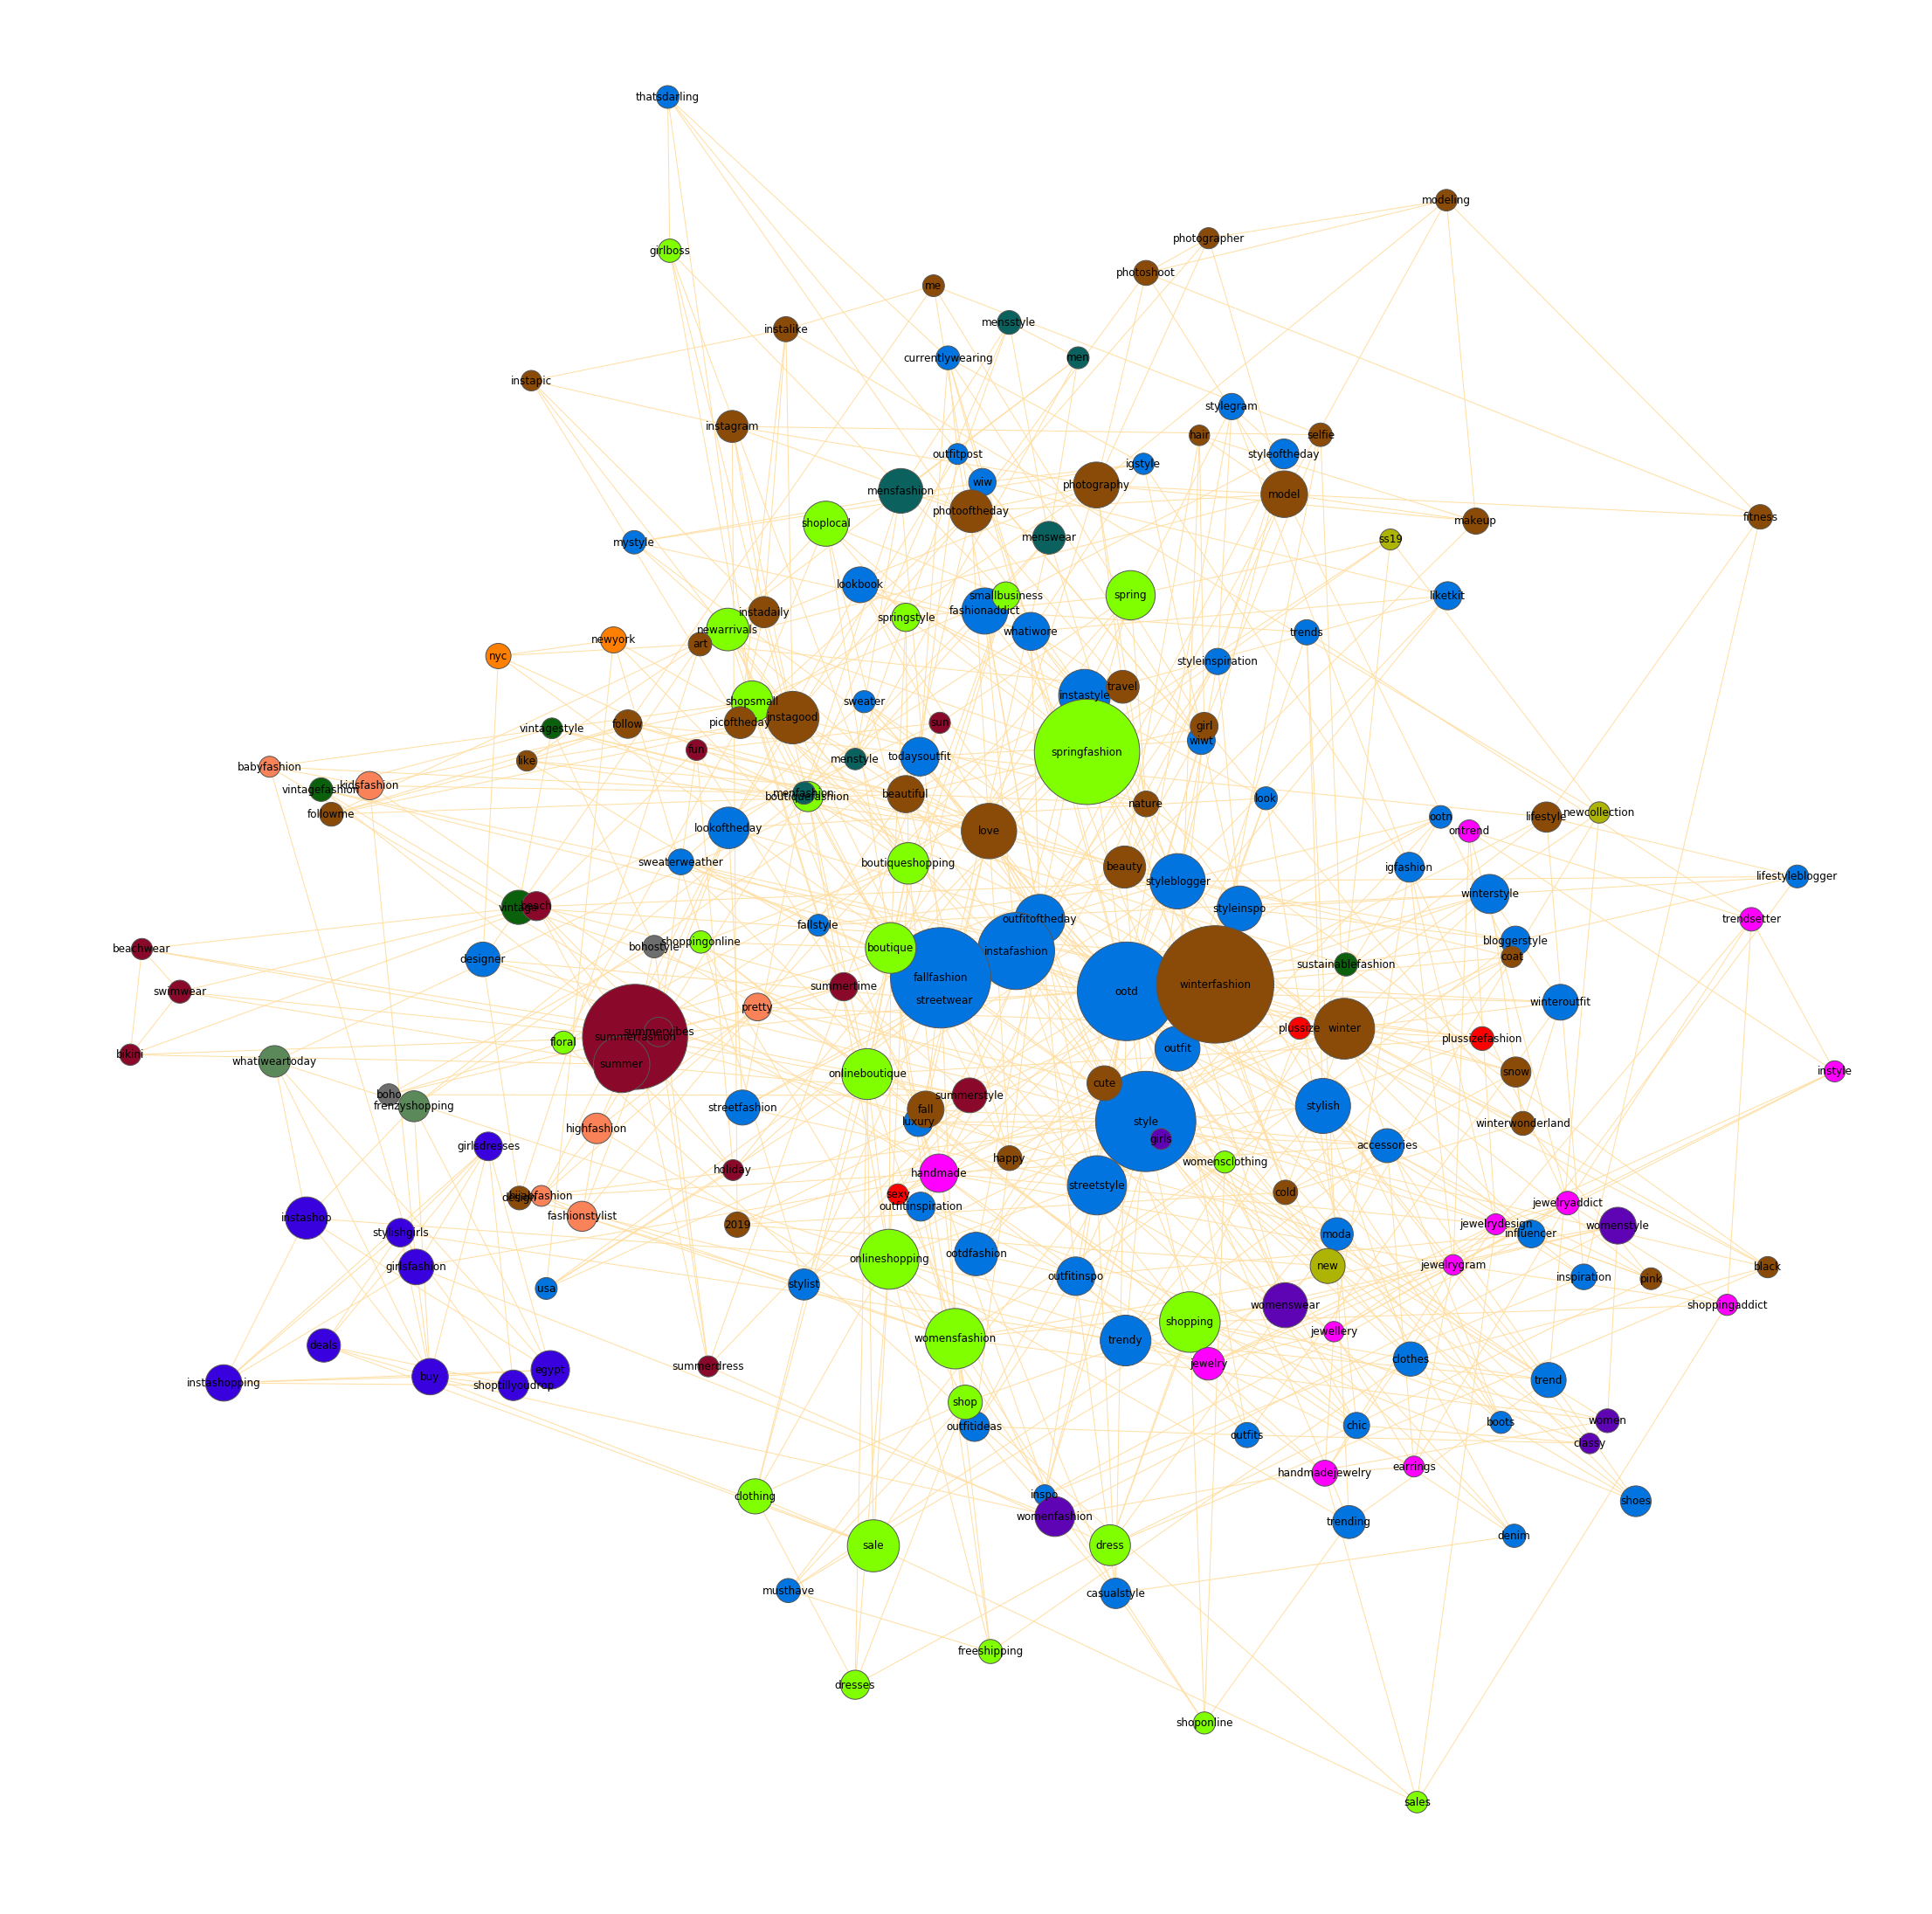

In [336]:
G = nx.Graph(day = "Stackoverflow")

for index,row in group_sort.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    

# #     
# for index1,row1 in group_sort.iterrows():
#     for index2,row2 in group_sort.iterrows():
#         if row1['Tag'] == row2['Tag']:
#             continue
#         if corr_affinity[row1['Tag']][row2['Tag']] > 0.15:
#             G.add_edge(row1['Tag'],row2['Tag'],weight = 5 if corr_affinity[row1['Tag']][row2['Tag']] > 0.4 
#                        else 3 if corr_affinity[row1['Tag']][row2['Tag']] > 0.2
#                       else 1 if corr_affinity[row1['Tag']][row2['Tag']] > 0.1 else 0)


# corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
i = 0
for index1,row1 in node_df.iterrows():
    for j in range(5):
        try:
            G.add_edge(row1['Tag'],max_values[i][j],weight = corr_affinity[row1['Tag']][max_values[i][j]]*5 )
        except:
            print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
    
    i += 1

color_map = {1:'#FF0000', 2:'#FF8000', 3:'#AEB404', 4:'#80FF00', 5:'#0B610B', 6:'#0B615E',  
             7:'#6E6E6E', 0:'#0174DF', 8:'#3A01DF', 9:'#5F04B4', 10:'#FF00FF', 11:'#8A0829',
            12:'#8A4B08',13: '#FA8258' ,14:'#5B895A'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('Hash_Network_Graph_image/allseason_notGroupby_groupsort_n15_2m_threshold_affinity_007_maxvalue_5')

# Clustering Group

In [271]:
tmp = group_sort[group_sort.Group == 0]

In [272]:
tags = tmp.Tag

In [273]:
tags = list(tags)
print(tags)

['winterstyle', 'mystyle', 'denim', 'luxury', 'outfitinspiration', 'look', 'lifestyleblogger', 'styleblogger', 'thatsdarling', 'bloggerstyle', 'igfashion', 'styleoftheday', 'outfit', 'boots', 'sweaterweather', 'ootn', 'liketkit', 'stylish', 'wiwt', 'inspiration', 'todaysoutfit', 'trends', 'outfits', 'outfitoftheday', 'fashionaddict', 'trendy', 'styleinspiration', 'instastyle', 'stylegram', 'musthave', 'wiw', 'currentlywearing', 'influencer', 'styleinspo', 'sweater', 'casualstyle', 'outfitideas', 'ootdfashion', 'usa', 'streetfashion', 'trend', 'instafashion', 'lookbook', 'ootd', 'designer', 'outfitpost', 'inspo', 'streetwear', 'whatiwore', 'style', 'fallfashion', 'outfitinspo', 'winteroutfit', 'clothes', 'chic', 'accessories', 'fallstyle', 'shoes', 'streetstyle', 'stylist', 'igstyle', 'lookoftheday', 'moda', 'trending']


In [274]:
c_group = list()
for i in range(15):
    tmp = group_sort[group_sort.Group == i]
    tags = list(tmp.Tag)
    c_group.append(tags)
    

In [275]:
type(c_group[0])

list

In [276]:
testarray = np.array(c_group)

In [277]:
croup = pd.DataFrame(testarray)

In [278]:
croup

,0
0,"[winterstyle, mystyle, denim, luxury, outfitin..."
1,"[plussizefashion, plussize, sexy]"
2,"[newyork, nyc]"
3,"[new, ss19, newcollection]"
4,"[boutiquefashion, springfashion, springstyle, ..."
5,"[vintage, sustainablefashion, vintagestyle, vi..."
6,"[men, menswear, menstyle, menfashion, mensfash..."
7,"[bohostyle, boho]"
8,"[egypt, instashop, girlsfashion, shoptillyoudr..."
9,"[womenswear, womenfashion, womenstyle, girls, ..."


In [279]:
croup.columns = ['Tags']

In [280]:
croup

,Tags
0,"[winterstyle, mystyle, denim, luxury, outfitin..."
1,"[plussizefashion, plussize, sexy]"
2,"[newyork, nyc]"
3,"[new, ss19, newcollection]"
4,"[boutiquefashion, springfashion, springstyle, ..."
5,"[vintage, sustainablefashion, vintagestyle, vi..."
6,"[men, menswear, menstyle, menfashion, mensfash..."
7,"[bohostyle, boho]"
8,"[egypt, instashop, girlsfashion, shoptillyoudr..."
9,"[womenswear, womenfashion, womenstyle, girls, ..."


In [332]:
a = croup.loc[9]

In [333]:
b = a['Tags']

In [334]:
b

['womenswear', 'womenfashion', 'womenstyle', 'girls', 'women', 'classy']